# Payment Date Prediction 


### Importing related Libraries 

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Store the dataset into the Dataframe


In [4]:
df=pd.read_csv('dataset.csv')

### Check the shape of the dataframe


In [5]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [7]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [8]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [9]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [10]:
df.isnull().sum()*100/len(df)
#df.isnull().mean() * 100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [11]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [12]:
print(np.where(df['baseline_create_date'] == df['document_create_date'],True,False))
print(np.where(df['baseline_create_date'] == df['document_create_date.1'],True,False))
print(np.where(df['document_create_date.1'] == df['document_create_date'],True,False))

[False  True  True ... False False False]
[ True  True  True ...  True  True False]
[False  True  True ... False False  True]


#### Please check, Column 'posting_id' is constant columns or not


In [13]:
df['posting_id'].unique()

array([1.])

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [14]:
df['isOpen'].nunique()

2

In [15]:
df.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.015241,0.979477,0.984438,0.990314,NaN,NaN,0.002743,0.984763,-0.013742,0.753522
doc_id,-0.015241,1.000000,-0.011879,-0.013437,-0.016548,NaN,NaN,0.168460,-0.011666,1.000000,-0.008764
document_create_date,0.979477,-0.011879,1.000000,0.994547,0.976467,NaN,NaN,0.006847,0.994078,-0.010089,0.762133
document_create_date.1,0.984438,-0.013437,0.994547,1.000000,0.980958,NaN,NaN,0.005598,0.999527,-0.011609,0.762191
due_in_date,0.990314,-0.016548,0.976467,0.980958,1.000000,NaN,NaN,0.003983,0.981420,-0.014778,0.754217
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.002743,0.168460,0.006847,0.005598,0.003983,NaN,NaN,1.000000,0.005972,0.178028,0.013875
baseline_create_date,0.984763,-0.011666,0.994078,0.999527,0.981420,NaN,NaN,0.005972,1.000000,-0.009761,0.761918
invoice_id,-0.013742,1.000000,-0.010089,-0.011609,-0.014778,NaN,NaN,0.178028,-0.009761,1.000000,-0.007517


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [16]:
df.drop(labels=['area_business','posting_id','invoice_id','document_create_date','isOpen','document type',
                'document_create_date.1'] ,axis=1,inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [17]:
df.columns
#dropped the columns are removed

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [18]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [19]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [20]:
df.drop_duplicates(keep=False,inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [21]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [22]:
df.shape
#or we can also do this len(df.axes[0]) and len(df.axes[1])

(47692, 12)

### Find out the total count of null values in each columns

In [23]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9367
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [24]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [25]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [26]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'],format= '%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'])

### Please check the datatype of all the columns after conversion of the above 4 columns

In [27]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [28]:
df['invoice_currency'].value_counts()

USD    43953
CAD     3739
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [29]:
df[['total_open_amount']]

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
df['converted_usd']=np.where(df['invoice_currency']=='CAD',(df['total_open_amount']*0.7),df['total_open_amount'])

### Display the new "converted_usd" column values

In [31]:
df[['converted_usd']]

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [32]:
df['buisness_year'].value_counts()

2019.0    33242
2020.0    14450
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [33]:
df.drop(labels=['invoice_currency','total_open_amount'] ,axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [34]:
len(df.axes[1])

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [35]:
df.columns[df.isna().any()].to_list()

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [36]:
df['clear_date'].isnull().sum()

9367

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [37]:
#testing data
nulldata=df[df['clear_date'].isnull()].copy()

In [38]:
#training data
maindata=df[df['clear_date'].notnull()].copy()

In [39]:
#checking for any column which  has all the values
maindata.dropna(how='all',inplace=True,axis=1)
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,1970-01-01 00:00:00.020200126,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,1970-01-01 00:00:00.020190722,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,1970-01-01 00:00:00.020190914,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,1970-01-01 00:00:00.020191113,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,1970-01-01 00:00:00.020190924,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,1970-01-01 00:00:00.020190710,NAC6,84780.400
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,1970-01-01 00:00:00.020190815,NAH4,6766.540
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,1970-01-01 00:00:00.020200219,NAA8,6120.860
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,1970-01-01 00:00:00.020191127,NAA8,63.480


### Check the number of Rows and Columns for both the dataframes 

In [40]:
print('Rows and Columns of maindata: ' + str(len(maindata.axes[0])) + ', ' + str(len(maindata.axes[1])))

Rows and Columns of maindata: 38325, 11


In [41]:
print('Rows and Columns of nulldata: ' + str(len(nulldata.axes[0])) + ', ' + str(len(nulldata.axes[1])))

Rows and Columns of nulldata: 9367, 11


### Display the 5 records from maindata and nulldata dataframes

In [42]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,1970-01-01 00:00:00.020200126,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,1970-01-01 00:00:00.020190722,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,1970-01-01 00:00:00.020190914,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,1970-01-01 00:00:00.020191113,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,1970-01-01 00:00:00.020190924,CA10,15558.088


In [43]:
nulldata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,1970-01-01 00:00:00.020200331,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,1970-01-01 00:00:00.020200319,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,1970-01-01 00:00:00.020200311,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,1970-01-01 00:00:00.020200415,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,1970-01-01 00:00:00.020200416,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [44]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']

In [45]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38325 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   business_code         38325 non-null  object         
 1   cust_number           38325 non-null  object         
 2   name_customer         38325 non-null  object         
 3   clear_date            38325 non-null  datetime64[ns] 
 4   buisness_year         38325 non-null  float64        
 5   doc_id                38325 non-null  float64        
 6   posting_date          38325 non-null  datetime64[ns] 
 7   due_in_date           38325 non-null  datetime64[ns] 
 8   baseline_create_date  38325 non-null  datetime64[ns] 
 9   cust_payment_terms    38325 non-null  object         
 10  converted_usd         38325 non-null  float64        
 11  Delay                 38325 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), float64(3), object(4), timedelta64[ns]

In [46]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,1970-01-01 00:00:00.020200126,NAH4,54273.280,1 days
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,1970-01-01 00:00:00.020190722,NAD1,79656.600,-3 days
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,1970-01-01 00:00:00.020190914,NAA8,2253.860,92 days
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,1970-01-01 00:00:00.020191113,NAH4,33133.290,-3 days
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,1970-01-01 00:00:00.020190924,CA10,15558.088,61 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,1970-01-01 00:00:00.020190710,NAC6,84780.400,0 days
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,1970-01-01 00:00:00.020190815,NAH4,6766.540,4 days
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,1970-01-01 00:00:00.020200219,NAA8,6120.860,0 days
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,1970-01-01 00:00:00.020191127,NAA8,63.480,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [47]:
maindata['avgdelay']=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [48]:
maindata['avgdelay']=maindata['name_customer'].map(maindata.groupby('name_customer')['Delay'].mean(numeric_only=False))

In [49]:
maindata['avgdelay']

0       -3 days +07:14:33.372781066
1                  19 days 00:00:00
2                   9 days 02:24:00
4       -3 days +19:55:34.317343174
5        73 days 13:42:51.428571429
                    ...            
49994   -1 days +14:08:50.526315790
49996   -3 days +13:02:45.617433415
49997     1 days 01:08:34.285714285
49998     1 days 14:12:55.384615384
49999   -4 days +03:41:32.307692308
Name: avgdelay, Length: 38325, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [50]:
maindata['avgdelay']=abs(pd.to_timedelta(maindata['avgdelay']).dt.total_seconds())+abs(maindata['avgdelay'].dt.seconds)

### Display the maindata dataframe 

In [51]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,1970-01-01 00:00:00.020200126,NAH4,54273.280,1 days,2.591996e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,1970-01-01 00:00:00.020190722,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,1970-01-01 00:00:00.020190914,NAA8,2253.860,92 days,7.948800e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,1970-01-01 00:00:00.020191113,NAH4,33133.290,-3 days,2.591997e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,1970-01-01 00:00:00.020190924,CA10,15558.088,61 days,6.405942e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,1970-01-01 00:00:00.020190710,NAC6,84780.400,0 days,8.639947e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,1970-01-01 00:00:00.020190815,NAH4,6766.540,4 days,2.591994e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,1970-01-01 00:00:00.020200219,NAA8,6120.860,0 days,9.462829e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,1970-01-01 00:00:00.020191127,NAA8,63.480,0 days,1.887504e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [52]:
maindata.drop(labels=['Delay','clear_date'],axis=1,inplace=True)

In [53]:
maindata

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avgdelay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,1970-01-01 00:00:00.020200126,NAH4,54273.280,2.591996e+05
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,1970-01-01 00:00:00.020190722,NAD1,79656.600,1.641600e+06
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,1970-01-01 00:00:00.020190914,NAA8,2253.860,7.948800e+05
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,1970-01-01 00:00:00.020191113,NAH4,33133.290,2.591997e+05
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,1970-01-01 00:00:00.020190924,CA10,15558.088,6.405942e+06
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,1970-01-01 00:00:00.020190710,NAC6,84780.400,8.639947e+04
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,1970-01-01 00:00:00.020190815,NAH4,6766.540,2.591994e+05
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,1970-01-01 00:00:00.020200219,NAA8,6120.860,9.462829e+04
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,1970-01-01 00:00:00.020191127,NAA8,63.480,1.887504e+05


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [54]:
X=maindata[set(maindata.columns)-set(['avgdelay'])]

In [55]:
y=maindata['avgdelay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [56]:
X_train,X_loc_test,y_train,y_loc_test=train_test_split(X,y,test_size=0.4)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [57]:
print("X_train "+str(X_train.shape))
print("X_loc_test "+str(X_loc_test.shape))
print("y_train "+str(y_train.shape))
print("y_loc_test "+str(y_loc_test.shape))

X_train (22995, 10)
X_loc_test (15330, 10)
y_train (22995,)
y_loc_test (15330,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [58]:
X_val,X_test,y_val,y_test=train_test_split(X_loc_test,y_loc_test,test_size=0.5)

### Please check for the number of rows and columns of all the 4 dataframes 

In [59]:
print("X_val "+str(X_val.shape))
print("X_test "+str(X_test.shape))
print("y_val "+str(y_val.shape))
print("y_test "+str(y_test.shape))

X_val (7665, 10)
X_test (7665, 10)
y_val (7665,)
y_test (7665,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

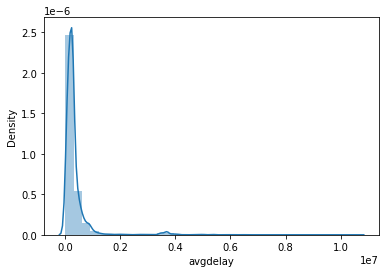

In [60]:
sns.distplot(y ,bins=35)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [61]:
x_train = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [62]:
x_train

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,17135 llc,1
3,99 CE,2
4,99 CE associates,2
...,...,...
3070,YEN BROS co,1
3071,YEN BROS corp,1
3072,YEN BROS corporation,1
3073,ZARCO co,1


### You can make another distribution plot of the "doc_id" column from x_train

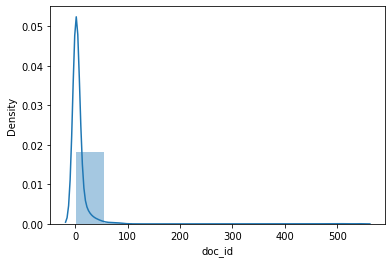

In [63]:
sns.distplot(x_train['doc_id'] ,bins=10)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


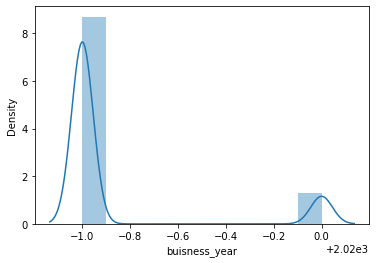

In [64]:
sns.distplot(X_train['buisness_year'],bins=10)

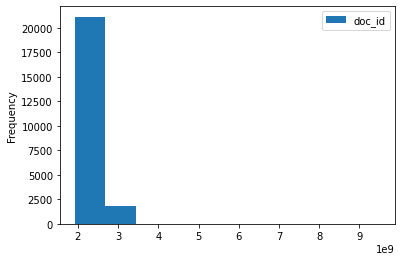

In [65]:
X_train.plot(x='buisness_year', y='doc_id', kind='hist')
X_train.buisness_year.value_counts()
plt.show()

# Feature Engineering 

### Display and describe the X_train dataframe 

In [66]:
X_train

,business_code,posting_date,doc_id,converted_usd,due_in_date,cust_number,buisness_year,cust_payment_terms,baseline_create_date,name_customer
26130,U001,2019-01-02,1.928554e+09,321.630,2019-01-17,0200152991,2019.0,NAA8,1970-01-01 00:00:00.020190102,JET in
1665,CA02,2019-03-07,2.960533e+09,16741.942,2019-03-18,0100012991,2019.0,CA10,1970-01-01 00:00:00.020190308,CJR WH llc
31500,U001,2019-04-03,1.929077e+09,62.160,2019-04-24,200353024,2019.0,NAM4,1970-01-01 00:00:00.020190401,DECA trust
16661,U001,2020-02-25,1.930567e+09,126.670,2020-03-11,0200726979,2020.0,NAA8,1970-01-01 00:00:00.020200225,BJ'S systems
15366,U001,2019-01-21,1.928652e+09,99973.840,2019-02-05,0200762301,2019.0,NAC6,1970-01-01 00:00:00.020190121,C&S WH us
...,...,...,...,...,...,...,...,...,...,...
24115,CA02,2020-02-20,2.960616e+09,3213.840,2020-03-09,0140106181,2020.0,CA10,1970-01-01 00:00:00.020200228,THE us
34545,U001,2020-02-07,1.930492e+09,502.540,2020-02-22,0200726979,2020.0,NAA8,1970-01-01 00:00:00.020200207,BJ'S co
14028,U001,2019-10-08,1.929976e+09,9939.600,2019-10-08,CCU013,2019.0,NAX2,1970-01-01 00:00:00.020191008,KRAFT F associates
31987,U001,2019-11-15,1.930153e+09,9444.000,2019-11-15,CCU013,2019.0,NAX2,1970-01-01 00:00:00.020191115,KRAFT F corp


In [67]:
X_train.describe()

,doc_id,converted_usd,buisness_year
count,2.299500e+04,22995.000000,22995.000000
mean,2.014005e+09,30615.457200,2019.131594
std,2.922672e+08,36604.873882,0.338056
min,1.928502e+09,0.790000,2019.000000
25%,1.929173e+09,4505.850000,2019.000000
50%,1.929735e+09,16760.750000,2019.000000
75%,1.930209e+09,45222.560000,2019.000000
max,9.500000e+09,668593.360000,2020.000000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [68]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [69]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [70]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [71]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
26130,U001,1
1665,CA02,0
31500,U001,1
16661,U001,1
15366,U001,1
...,...,...
24115,CA02,0
34545,U001,1
14028,U001,1
31987,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [72]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [73]:
X_train ,X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [74]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [75]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [76]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [77]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [78]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [79]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [80]:
X_train.dtypes

posting_date              datetime64[ns]
doc_id                           float64
converted_usd                    float64
due_in_date               datetime64[ns]
cust_number                        int64
buisness_year                    float64
baseline_create_date      datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [81]:
X_test.dtypes

posting_date              datetime64[ns]
doc_id                           float64
converted_usd                    float64
due_in_date               datetime64[ns]
cust_number                        int64
buisness_year                    float64
baseline_create_date      datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [82]:
X_val.dtypes

posting_date              datetime64[ns]
doc_id                           float64
converted_usd                    float64
due_in_date               datetime64[ns]
cust_number                        int64
buisness_year                    float64
baseline_create_date      datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [83]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [84]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [85]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [86]:
X_train ,X_val,X_test =custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [87]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [88]:
X_train , X_val ,X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [89]:
X_train.dtypes

doc_id                    float64
converted_usd             float64
cust_number                 int64
buisness_year             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [90]:
X_val.dtypes

doc_id                    float64
converted_usd             float64
cust_number                 int64
buisness_year             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [91]:
X_test.dtypes

doc_id                    float64
converted_usd             float64
cust_number                 int64
buisness_year             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [92]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

13

- Note - Keep the code as it is, no need to change 


In [93]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

3


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [94]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

1


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [95]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [96]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['year_of_postingdate', 'month_of_due', 'year_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

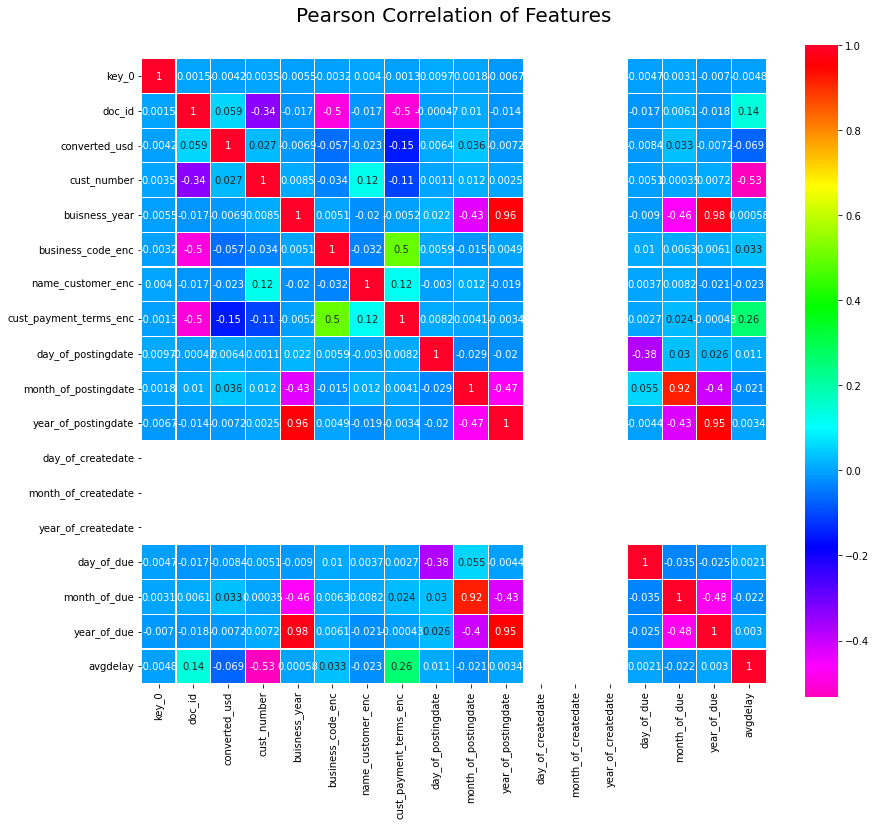

In [97]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [98]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [99]:
sel.variances_

array([8.54163871e+16, 1.33985852e+09, 1.77807021e+15, 1.14276890e-01,
       2.88539438e-01, 1.06943755e+06, 1.38491927e+02, 7.59829580e+01,
       1.23371730e+01, 1.15154270e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.59872970e+01, 1.21685149e+01, 1.17367198e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [100]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

475450.31762415083

### Display The Comparison Lists

In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[200577377193.62823],[0.38730985575108556],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [105]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regressor')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

584945.9262286094

### Display The Comparison Lists

In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor'],[200577377193.62823, 334087148823.9405],[0.38730985575108556, -0.020513411176218632],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [109]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [110]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [111]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

374224.43728504307

### Display The Comparison Lists

In [112]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor'],[200577377193.62823, 334087148823.9405, 124338457733.64326],[0.38730985575108556, -0.020513411176218632, 0.620191725156662],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [113]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [114]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [115]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

289679.98922794225

### Display The Comparison Lists


In [116]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor'],[200577377193.62823, 334087148823.9405, 124338457733.64326, 75967517796.22574],[0.38730985575108556, -0.020513411176218632, 0.620191725156662, 0.7679471628952973],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [117]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[12:09:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [118]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [119]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

326998.4303843364

### Display The Comparison Lists


In [120]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[200577377193.62823, 334087148823.9405, 124338457733.64326, 75967517796.22574, 96831482245.39426],[0.38730985575108556, -0.020513411176218632, 0.620191725156662, 0.7679471628952973, 0.704215422223342],

## You need to make the comparison list into a comparison dataframe 

In [121]:
comparator = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns =['Algorithm', 'MSE_Score', 'R2_Score'])
comparator

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.005774e+11,0.387310
1,Support Vector Regressor,3.340871e+11,-0.020513
2,Decision Tree Regressor,1.243385e+11,0.620192
3,Random Forest Regressor,7.596752e+10,0.767947
4,XGB Regressor,9.683148e+10,0.704215


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [122]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[12:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [123]:
mean_squared_error(y_test,predictedfinal,squared=False)

311177.5734936473

### Calculate the mean Square Error for validation dataset

In [124]:
mean_squared_error(y_val,predictedfinal,squared=False)

752502.3424967898

### Calculate the R2 score for test

In [125]:
r2_score(y_test,predictedfinal)

0.704215422223342

### Calculate the R2 score for Validation

In [126]:
r2_score(y_val,predict_testfinal)

0.6815670043828272

### Calculate the Accuracy for train Dataset 

In [127]:
regressorfinal.score(X_train,y_train)

0.7413208543197568

### Calculate the accuracy for validation

In [128]:
regressorfinal.score(X_val,y_val)

0.6815670043828272

### Calculate the accuracy for test

In [129]:
regressorfinal.score(X_test,y_test)

0.704215422223342

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [130]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,1970-01-01 00:00:00.020200331,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,1970-01-01 00:00:00.020200319,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,1970-01-01 00:00:00.020200311,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,1970-01-01 00:00:00.020200415,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,1970-01-01 00:00:00.020200416,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,1970-01-01 00:00:00.020200310,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,1970-01-01 00:00:00.020200503,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,1970-01-01 00:00:00.020200311,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,1970-01-01 00:00:00.020200325,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [131]:
print('Rows and Columns of nulldata: ' + str(len(nulldata.axes[0])) + ', ' + str(len(nulldata.axes[1])))

Rows and Columns of nulldata: 9367, 11


### Check the Description and Information of the nulldata 

In [132]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9367.0,9.367000e+03,9367.000000
mean,2020.0,2.005149e+09,32037.953968
std,0.0,2.657007e+08,35393.410016
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5612.600000
50%,2020.0,1.930731e+09,19046.800000
75%,2020.0,1.930818e+09,47641.455000
max,2020.0,2.960636e+09,653644.800000


In [133]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9367 non-null   object        
 1   cust_number           9367 non-null   object        
 2   name_customer         9367 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9367 non-null   float64       
 5   doc_id                9367 non-null   float64       
 6   posting_date          9367 non-null   datetime64[ns]
 7   due_in_date           9367 non-null   datetime64[ns]
 8   baseline_create_date  9367 non-null   datetime64[ns]
 9   cust_payment_terms    9367 non-null   object        
 10  converted_usd         9367 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 878.2+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [134]:
nulldata1 =nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [135]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [136]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [137]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] =nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year



### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [138]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [139]:
nulldata.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [140]:
drop_cols=['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate']
nulldata.drop(drop_cols, axis = 1,inplace=True)

### Check the information of the "nulldata" dataframe

In [141]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9367 non-null   int64  
 1   buisness_year           9367 non-null   float64
 2   doc_id                  9367 non-null   float64
 3   converted_usd           9367 non-null   float64
 4   business_code_enc       9367 non-null   int64  
 5   day_of_postingdate      9367 non-null   int64  
 6   month_of_postingdate    9367 non-null   int64  
 7   year_of_postingdate     9367 non-null   int64  
 8   day_of_due              9367 non-null   int64  
 9   month_of_due            9367 non-null   int64  
 10  year_of_due             9367 non-null   int64  
 11  day_of_createdate       9367 non-null   int64  
 12  month_of_createdate     9367 non-null   int64  
 13  year_of_createdate      9367 non-null   int64  
 14  cust_payment_terms_enc  9367 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [142]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 21034 to 27443
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   doc_id                  7665 non-null   float64
 1   converted_usd           7665 non-null   float64
 2   cust_number             7665 non-null   int64  
 3   buisness_year           7665 non-null   float64
 4   business_code_enc       7665 non-null   int64  
 5   name_customer_enc       7665 non-null   int64  
 6   cust_payment_terms_enc  7665 non-null   int64  
 7   day_of_postingdate      7665 non-null   int64  
 8   month_of_postingdate    7665 non-null   int64  
 9   year_of_postingdate     7665 non-null   int64  
 10  day_of_createdate       7665 non-null   int64  
 11  month_of_createdate     7665 non-null   int64  
 12  year_of_createdate      7665 non-null   int64  
 13  day_of_due              7665 non-null   int64  
 14  month_of_due            7665 non-nu

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [143]:
X_test.columns

Index(['doc_id', 'converted_usd', 'cust_number', 'buisness_year',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [144]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [145]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [146]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,67,2704,5,30,3,2020,1,1,1970,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,67,2785,20,19,3,2020,1,1,1970,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,67,96,20,11,3,2020,1,1,1970,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,67,2021,20,15,4,2020,1,1,1970,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,67,714,36,23,4,2020,1,1,1970,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,67,2986,34,10,3,2020,1,1,1970,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,67,2984,34,3,5,2020,1,1,1970,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,67,794,20,11,3,2020,1,1,1970,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,67,2749,20,25,3,2020,1,1,1970,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [147]:
 final_result = regressorfinal.predict(nulldata2)

ValueError: ignored

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [148]:
final_result = pd.Series(final_result,name='avg_delay')

NameError: ignored

### Display the "avg_delay" column

In [ ]:
final_result

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [ ]:
Final

### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
print('Rows and Columns are : ' + str(len(Final.axes[0])) + ', ' + str(len(Final.axes[1])))

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date']

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [ ]:
Final['avg_delay']

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:

bins =  [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final.drop('key_0',axis=1,inplace=True)
Final.drop('avg_delay',axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
Final['Aging Bucket'].value_counts()

### Display your final dataset with aging buckets 

In [ ]:
Final

### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('HRC61299WK_SHAILESH_BHARTI.csv')

# END OF THE PROJECT